Сначала необходимо подготовить датасет. Ниже приведены ссылки на некоторые датасеты, которые я рекомендую использовать:
1) DIV2K - https://data.vision.ee.ethz.ch/cvl/DIV2K/ <br>
2) COCO dataset - http://images.cocodataset.org/zips/train2014.zip, http://images.cocodataset.org/zips/test2014.zip <br>
3) FLICKR2k - https://drive.google.com/drive/folders/1AAI2a2BmafbeVExLH-l0aZgvPgJCk5Xm <br>

В этом туториале мы будем использовать COCO и DIV2K датасеты для обучения.<br>

In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from utils import create_data_lists

Функция `сreate_data_lists(train_folders=[...], test_folders=[...], min_size, output_folder)` принимает список путей к папкам, в которых лежат только hr изображения, и записывает пути ко всем изображениям в json формате. Параметр `min_size` определяет какой минимальный размер (по обеим сторонам) должен быть у каждого изображения.

Создадим json с изображениями для обучения из объединенных COCO и DIV2k, а для проверки качества модели сделаем тестовый json из валидационных изображений DIV2k. <br>
В параметрах `train_folders` и `test_folders` пути к папкам с изображениями замените на свои. <br>

In [3]:
save_folder = './jsons/' #папка, в которую будут сохранены json-ы

# может выполняться около 2-3 минут, в зависимости от кол-ва изображений
create_data_lists(
    train_folders=[
        '../datasets/coco_ds/train2014',
        '../datasets/DIV2K/DIV2K_train_HR/'
    ],
    test_folders=['../datasets/DIV2K/DIV2K_valid_HR/'],
    min_size=257,
    output_folder=save_folder
)


Creating data lists... this may take some time.

There are 82969 images in the training data.

There are 100 images in the  test data.

JSONS containing lists of Train and Test images have been saved to ./jsons/



Посмотрим на формат составленных json-ов: <br>
Каждый такой json - это просто список путей к изображениям из всех датасетов

Все json файлы из папки:  ['train_images.json', 'test_images.json']
['../datasets/DIV2K/DIV2K_valid_HR/0897.png', '../datasets/DIV2K/DIV2K_valid_HR/0887.png', '../datasets/DIV2K/DIV2K_valid_HR/0806.png', '../datasets/DIV2K/DIV2K_valid_HR/0834.png', '../datasets/DIV2K/DIV2K_valid_HR/0896.png']


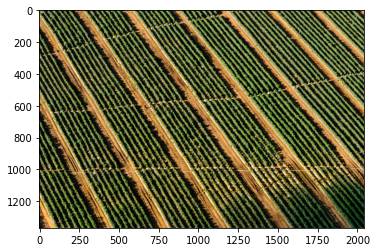

In [9]:
print('Все json файлы из папки: ', [obj for obj in os.listdir(save_folder) if obj.split('.')[1] == 'json'])

with open(os.path.join(save_folder,'test_images.json'), 'rt') as f:
    data = json.loads(f.read())
    
print(data[:5]) #выведем первые 5 элементов списка

plt.imshow(plt.imread(data[0])) #выведем изображение